In [70]:
import numpy as np
import pandas as pd

In [71]:
df = pd.read_csv('/Users/nirbhaysedha/Documents/SPAM_CLASSIFIER/spam.csv', encoding='latin1')

In [72]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
3715,ham,Networking technical support associate.,NaN,NaN,NaN
3757,ham,Lol no ouch but wish i'd stayed out a bit longer,NaN,NaN,NaN
1000,ham,No..but heard abt tat..,NaN,NaN,NaN
465,ham,great princess! I love giving and receiving or...,NaN,NaN,NaN
2779,ham,Well I might not come then...,NaN,NaN,NaN


In [73]:
df.shape

(5572, 5)

In [74]:
# data cleaning
# eda
# text predprocessing
# model building
# model evaluation 
# improvements
# website
# deploy on heroku

# Data Cleaning

In [75]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [76]:
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [77]:
df.sample(5)

,v1,v2
2363,spam,Fantasy Football is back on your TV. Go to Sky...
4802,ham,How do you plan to manage that
5150,ham,Happy new year to u and ur family...may this n...
2524,spam,FREE entry into our å£250 weekly comp just sen...
3176,ham,In meeting da. I will call you


In [78]:
df.rename(columns={'v1':'Target','v2':'Text'},inplace=True)

In [79]:
df.head()

,Target,Text
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [80]:
from sklearn.preprocessing import LabelEncoder

In [81]:
encoder=LabelEncoder()

In [82]:
df['Target']=encoder.fit_transform(df['Target'])

In [83]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [84]:
df.isnull().sum()

Target    0
Text      0
dtype: int64

In [85]:
# find duplicates
df.duplicated().sum()

403

In [86]:
# drop duplicate values
df=df.drop_duplicates(keep='first')

In [87]:
df.duplicated().sum()

0

# Exploratory data anlysis

In [88]:
df['Target'].value_counts()

Target
0    4516
1     653
Name: count, dtype: int64

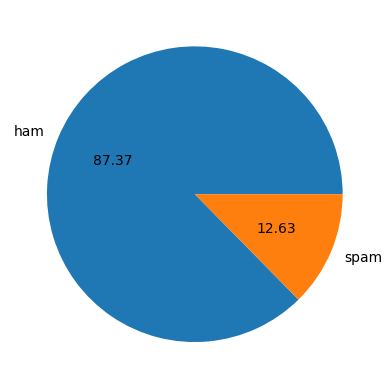

In [89]:
import matplotlib.pyplot as plt
plt.pie(df['Target'].value_counts(),labels=['ham','spam'],autopct='%0.2f')
plt.show()

In [90]:
# this mean data is imbalanced

In [91]:
import nltk

In [92]:
!pip install nltk

In [93]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/nirbhaysedha/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [94]:
df['num_char']=df['Text'].apply(len)

In [95]:
df.head()

,Target,Text,num_char
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [96]:
df['num_words']=df['Text'].apply(lambda x:len(nltk.word_tokenize(x)))
# text broke in words

In [97]:
df.head()

,Target,Text,num_char,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [98]:
df['num_sentences']=df['Text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [99]:
df.head()

,Target,Text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [100]:
df[['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,18.455794,1.965564
std,58.236293,13.324758,1.448541
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,60.000000,15.000000,1.000000
75%,117.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [101]:
# for ham
df[df['Target']==0][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,17.123782,1.820195
std,56.358207,13.493970,1.383657
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,52.000000,13.000000,1.000000
75%,90.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [102]:
# for spam
df[df['Target']==1][['num_char','num_words','num_sentences']].describe()

,num_char,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,27.667688,2.970904
std,30.137753,7.008418,1.488425
min,13.000000,2.000000,1.000000
25%,132.000000,25.000000,2.000000
50%,149.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,224.000000,46.000000,9.000000


In [103]:
import seaborn as sns

/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future ver

<Axes: xlabel='num_char', ylabel='Count'>

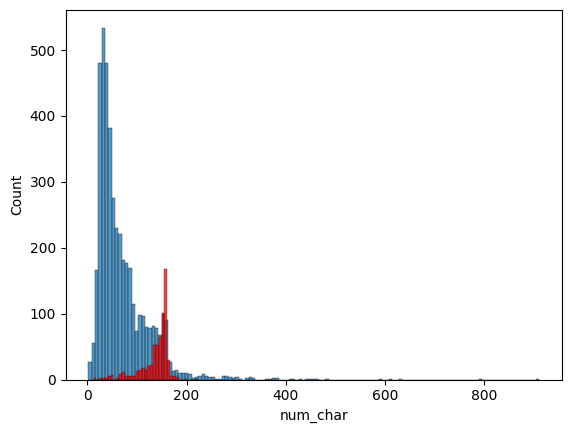

In [104]:
sns.histplot(df[df['Target']==0]['num_char'])
sns.histplot(df[df['Target']==1]['num_char'],color='red')

/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/seaborn/_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use 

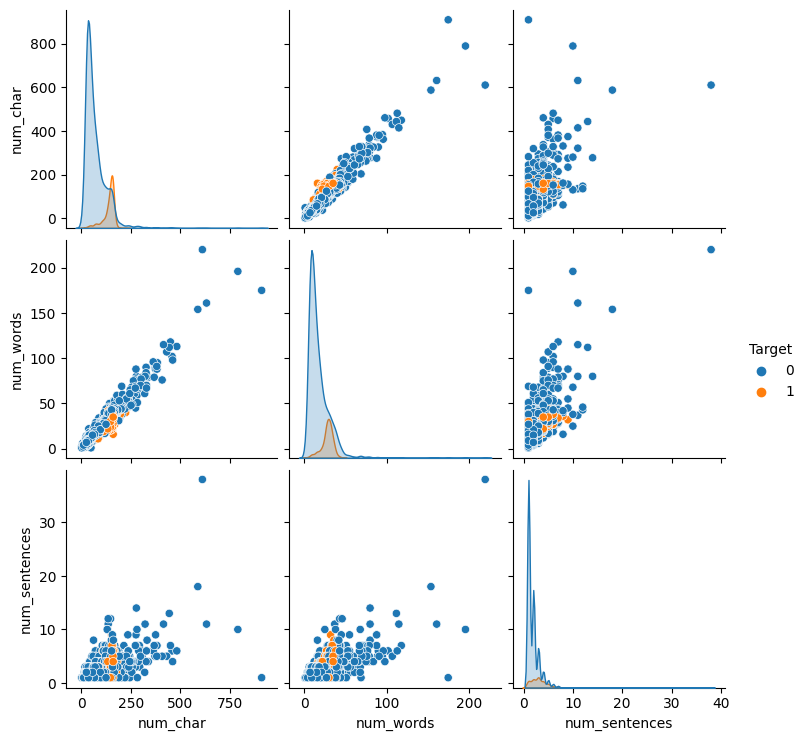

In [105]:
sns.pairplot(df,hue='Target')

In [106]:
from nltk.corpus import stopwords
import string
from nltk.stem import PorterStemmer as ps


# Data PreProcessing

In [107]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    
            
    return " ".join(y)

In [108]:
df.head()

,Target,Text,num_char,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [109]:
df=df.iloc[:,0:2]

In [110]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [111]:
df_reset = df.reset_index(drop=True)

In [112]:
df.head()

,Target,Text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [113]:
from sklearn.feature_extraction.text import CountVectorizer

In [114]:
x=df.iloc[:,1]

In [115]:
y=df.iloc[:,0]

In [116]:
vectorizer=CountVectorizer()

In [117]:
x=vectorizer.fit_transform(x)

In [119]:
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import CategoricalNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import ComplementNB

In [120]:
Model1=GaussianNB()
Model2=MultinomialNB()
Model3=CategoricalNB()
Model4=BernoulliNB()
Model5=ComplementNB()

In [121]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [132]:
x=x.toarray()

In [135]:
M1= cross_val_score(Model1, x, y, cv=5, scoring='accuracy')
M2=cross_val_score(Model2,x,y,cv=10,scoring='accuracy')
M3=cross_val_score(Model3,x,y,scoring='accuracy',cv=10)
M4=cross_val_score(Model4,x,y,scoring='accuracy',cv=10)
M5=cross_val_score(Model5,x,y,scoring='accuracy',cv=10)

/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:842: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 136, in __call__
    score = scorer._score(
  File "/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 353, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 86, in _cached_call
    result, _ = _get_response_values(
  File "/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/sklearn/utils/_response.py", line 85, in _get_response_values
    y_pred = prediction_method(X)
  File "/Users/nirbhaysedha/miniforge3/lib/python3.10/site-packages/sklearn/naive_bayes.py", line 102, 

In [138]:
print(np.mean(M1))
print(np.mean(M2))
print(np.mean(M3))
print(np.mean(M4))
print(np.mean(M5))

0.9059796540095606
0.979494849534434
nan
0.9796871485763123
0.964405184951944


In [143]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=23)

In [144]:
Model4.fit(x_train,y_train)

BernoulliNB()

In [145]:
y_pred=Model4.predict(x_test)

In [146]:
print("best Model is bernouli here i acheived accuracy of",accuracy_score(y_test,y_pred))

best Model is bernouli here i acheived accuracy of 0.9806576402321083
